## [詳解ディープラーニング　TensorFlow・Kerasによる時系列データ処理](https://book.mynavi.jp/ec/products/detail/id=72995)
　巣籠悠輔 著  
　マイナビ出版  
　ISBN : 978-4-8399-6251-7  
　発売 : 2017/05/30  
  
support site : [https://book.mynavi.jp/supportsite/detail/9784839962517.html](https://book.mynavi.jp/supportsite/detail/9784839962517.html)  
github : [yusugomori/deeplearning-tensorflow-keras](https://github.com/yusugomori/deeplearning-tensorflow-keras) 

Most of codes and explanations in this notebook are based on the textbook.  
If you want to use codes in this notebook, please check the book and original codes from the above.  

---
## ３章　単純パーセプトロン

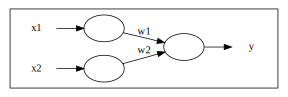

In [1]:
from graphviz import Digraph

dot = Digraph()
dot.graph_attr['rankdir']='LR'
dot.graph_attr['size']="4,4"

with dot.subgraph(name='cluster_0') as c:
    c.node('x1', 'x1', shape='plaintext')
    c.node('x2', 'x2', shape='plaintext')
    c.node('l1a', '')
    c.node('l1b', '')
    c.edge('x1', 'l1a')
    c.edge('x2', 'l1b')
    c.node('l2', '')
    c.edge('l1a','l2', label='w1')
    c.edge('l1b', 'l2', label='w2')
    c.node('y', 'y',shape='plaintext')
    c.edge('l2','y')
    c.body.append('{rank=min; x1; x2;}')
    c.body.append('{rank=max; y;}')

dot

ニューロンのモデルとして、上の図のような１層パーセプトロンを考える。  
　（ただし、確率的な挙動は一切示さないものとする）  
入力 $x_{1}$、$x_{2}$ を受けた時に、重み付き和が閾値 $\theta$を超えた時に発火する、すなわち  
  
\begin{align*}
y=\begin{cases}
1 & (w_{1}x_{1} + w_{2}x_{2} \geq \theta) \\\
0 & (w_{1}x_{1} + w_{2}x_{2} < \theta) 
\end{cases}\end{align*}
に従って出力 $y$ が決定するものとする。  

上記モデルのパラメータ $(w_{1}, w_{2}, \theta)$ の値を誤り訂正学習法によって得ることを考える。  
  
正しい出力 $t$ が既知であるとき  
　$ y > t $ なら $y$ が小さくなるように修正する    
　$ y < t $ なら $y$ が大きくなるように修正する  
ことによって正しいパラメータを目指す。  
  
この修正分を $\Delta w_{1}$ 、 $\Delta w_{2}$ 、 $\Delta \theta$ と表し、k回目の学習によるパラメータを $(w_{1}^{k}, w_{2}^{k}, \theta^{k})$ とすると、この方法は  

\begin{align*}
\Delta w_{1} &= (t-y)x_{1} & w_{1}^{k+1} &= w_{1}^{k} + \Delta w_{1} \\
\Delta w_{2} &= (t-y)x_{2} & w_{2}^{k+1} &= w_{2}^{k} + \Delta w_{2} \\
\Delta \theta &= -(t-y) & \theta^{k+1} &= \theta^{k} + \Delta \theta
\end{align*}

のようにまとめることができる。  
この更新式を、$y-t=0$ となるまで行うことを試みる。  
  
パラメータの初期値を $(w_{1}, w_{2}, \theta) = (0, 0, 0)$ 、  
入力 $x_{1}, x_{2}$ は0または1の値をとり、正しい出力をANDゲートとするとき、   

In [2]:
import numpy as np
import pandas as pd

# 正解となる出力データ
def tercher_AND_gate(x1,x2):
    output = {(0,0):0, (0,1):0, (1,0):0, (1,1):1}
    return output[(x1, x2)]

# 使用するモデル
def y(x1, x2, w1, w2, theta):
    input_sum = w1*x1 + w2*x2 
    if input_sum >= theta:
        return 1
    else:
        return 0
    
def update(dataset, max_iter=100, w1=0, w2=0, theta=0, y=y, t=tercher_AND_gate):
    record = []
    iter_count = 0
    while iter_count < max_iter:
        val_dif = 0
        for i, data in enumerate(dataset):
            x1, x2 = data[0], data[1]
            t_val = t(x1, x2)
            y_val = y(x1, x2, w1, w2, theta)
            dw1 = (t_val - y_val) * x1
            dw2 = (t_val - y_val) * x2
            dtheta = -1 * (t_val - y_val)
            
            iter_count += 1
            val_dif = val_dif + abs(t_val - y_val)
            record.append([iter_count, x1, x2, t_val, w1, w2, theta, y_val, t_val-y_val, dw1, dw2, dtheta])
            
            w1 += dw1
            w2 += dw2
            theta += dtheta
            
        if val_dif==0:
            break         
    else:
        pass
    
    print("update finished. iter_count={0}".format(iter_count))
    print("w1, w2, theta = {}, {}, {}".format(w1, w2, theta))
    return record
            
    
w1, w2, theta = 0, 0, 0
dataset = [[0,0,0],[0,1,0],[1,0,0],[1,1,1]]

record = update(dataset, max_iter=100, w1=w1, w2=w2, theta=theta, t=tercher_AND_gate)
df = pd.DataFrame(record)
df.columns = ["k", "x1", "x2", "t", "w1", "w2", "theta", "y", "t-y", "dw1", "dw2", "dtheta"]
df

update finished. iter_count=24
w1, w2, theta = 2, 1, 3


,k,x1,x2,t,w1,w2,theta,y,t-y,dw1,dw2,dtheta
0,1,0,0,0,0,0,0,1,-1,0,0,1
1,2,0,1,0,0,0,1,0,0,0,0,0
2,3,1,0,0,0,0,1,0,0,0,0,0
3,4,1,1,1,0,0,1,0,1,1,1,-1
4,5,0,0,0,1,1,0,1,-1,0,0,1
5,6,0,1,0,1,1,1,1,-1,0,-1,1
6,7,1,0,0,1,0,2,0,0,0,0,0
7,8,1,1,1,1,0,2,0,1,1,1,-1
8,9,0,0,0,2,1,1,0,0,0,0,0
9,10,0,1,0,2,1,1,1,-1,0,-1,1


In [3]:
# ORゲートの場合
import numpy as np
import pandas as pd

def tercher_OR_gate(x1,x2):
    output = {(0,0):0, (0,1):1, (1,0):1, (1,1):1}
    return output[(x1, x2)]

w1, w2, theta = 0, 0, 0
dataset = [[0,0,0],[0,1,0],[1,0,0],[1,1,1]]

record = update(dataset, max_iter=100, w1=w1, w2=w2, theta=theta, t=tercher_OR_gate)
df = pd.DataFrame(record)
df.columns = ["k", "x1", "x2", "t", "w1", "w2", "theta", "y", "t-y", "dw1", "dw2", "dtheta"]
df

update finished. iter_count=16
w1, w2, theta = 1, 1, 1


,k,x1,x2,t,w1,w2,theta,y,t-y,dw1,dw2,dtheta
0,1,0,0,0,0,0,0,1,-1,0,0,1
1,2,0,1,1,0,0,1,0,1,0,1,-1
2,3,1,0,1,0,1,0,1,0,0,0,0
3,4,1,1,1,0,1,0,1,0,0,0,0
4,5,0,0,0,0,1,0,1,-1,0,0,1
5,6,0,1,1,0,1,1,1,0,0,0,0
6,7,1,0,1,0,1,1,0,1,1,0,-1
7,8,1,1,1,1,1,0,1,0,0,0,0
8,9,0,0,0,1,1,0,1,-1,0,0,1
9,10,0,1,1,1,1,1,1,0,0,0,0


In [4]:
# NOTゲートの場合

# 書籍と結果が違うが、書籍のほうでは
# y=1 if w*x >= theta　の不等号が　>　に置き換わっている？

import numpy as np
import pandas as pd

def tercher_NOT_gate(x):
    output = {0:1, 1:0}
    return output[x]

def y_single(x, w, theta):
    return 1 if w*x >= theta else 0

    # 書籍と同じ結果を出すなら
    #return 1 if w*x > theta else 0

def update_NOT_gate(dataset, max_iter=100, w=0, theta=0, y=y_single, t=tercher_NOT_gate):
    record = []
    iter_count = 0
    while iter_count < max_iter:
        val_dif = 0
        for i, data in enumerate(dataset):
            x = data[0]
            t_val, y_val = t(x), y(x, w, theta)
            dw, dtheta = (t_val - y_val) * x, -1*(t_val-y_val)
            iter_count += 1
            val_dif = val_dif + abs(t_val - y_val)
            record.append([iter_count, x, t_val, w, theta, y_val, t_val-y_val, dw, dtheta])
            w += dw
            theta += dtheta  
        if val_dif==0:
            break         
    else:
        pass
    
    print("update finished. iter_count={0}".format(iter_count))
    print("w, theta = {}, {}".format(w, theta))
    return record
    
w, theta, dataset = 0, 0, [[0,1],[1,0]]
record = update_NOT_gate(dataset, max_iter=100, w=w, theta=theta, y=y_single, t=tercher_NOT_gate)
df = pd.DataFrame(record)
df.columns = ["k", "x", "t", "w", "theta", "y", "t-y", "dw", "dtheta"]
df

update finished. iter_count=6
w, theta = -1, 0


,k,x,t,w,theta,y,t-y,dw,dtheta
0,1,0,1,0,0,1,0,0,0
1,2,1,0,0,0,1,-1,-1,1
2,3,0,1,-1,1,0,1,0,-1
3,4,1,0,-1,0,0,0,0,0
4,5,0,1,-1,0,1,0,0,0
5,6,1,0,-1,0,0,0,0,0


In [1]:
# 一括対応ver

import numpy as np
import pandas as pd

# 正解となる出力データ
def teacher_gate(x, teacher_data):
    return teacher_data[tuple(x)]

# 使用するモデル
def gate_model(x,w,theta):
    return 1 if np.sum(np.multiply(x,w)) >= theta else 0
    
def update(dataset, w, theta, teacher_data, max_iter=100, y=gate_model, t=teacher_gate):
    record = []
    iter_count, val_dif = 0, 1
    while (iter_count < max_iter) and (val_dif != 0):
        val_dif = 0
        
        for x in dataset:
            x = np.array(x)
            t_val, y_val = t(x, teacher_data), y(x, w, theta)
            dw = (t_val - y_val) * x
            dtheta = -1 * (t_val - y_val)
            
            iter_count += 1
            val_dif = val_dif + abs(t_val - y_val)
            record.append([iter_count, x, t_val, w, theta, y_val, t_val-y_val, dw, dtheta])
            w = np.add(w,dw)
            theta += dtheta
 
    print("update finished. iter_count={0}".format(iter_count))
    print("w, theta = {}, {}".format(w, theta))
    return record

dataset = {"two_input" : [[0,0],[0,1],[1,0],[1,1]],
           "one_input" : [[0],[1]]
          }
teacher_data = {"AND_gate" : {(0,0):0, (0,1):0, (1,0):0, (1,1):1},
                "OR_gate" : {(0,0):0, (0,1):1, (1,0):1, (1,1):1},
                "NOT_gate" : {(0,):1, (1,):0}
               }

# 初期値
w, theta = np.array([0,0]), np.array(0)

record = update(dataset["two_input"], w=w, theta=theta, 
                teacher_data = teacher_data["OR_gate"],
                max_iter=100)
df = pd.DataFrame(record)
df.columns = ["k", "x", "t", "w", "theta", "y", "t-y", "dw", "dtheta"]
df

update finished. iter_count=16
w, theta = [1 1], 1


,k,x,t,w,theta,y,t-y,dw,dtheta
0,1,"[0, 0]",0,"[0, 0]",1,1,-1,"[0, 0]",1
1,2,"[0, 1]",1,"[0, 0]",1,0,1,"[0, 1]",-1
2,3,"[1, 0]",1,"[0, 1]",1,1,0,"[0, 0]",0
3,4,"[1, 1]",1,"[0, 1]",1,1,0,"[0, 0]",0
4,5,"[0, 0]",0,"[0, 1]",1,1,-1,"[0, 0]",1
5,6,"[0, 1]",1,"[0, 1]",1,1,0,"[0, 0]",0
6,7,"[1, 0]",1,"[0, 1]",1,0,1,"[1, 0]",-1
7,8,"[1, 1]",1,"[1, 1]",1,1,0,"[0, 0]",0
8,9,"[0, 0]",0,"[1, 1]",1,1,-1,"[0, 0]",1
9,10,"[0, 1]",1,"[1, 1]",1,1,0,"[0, 0]",0


---

１層パーセプトロンをn個の入力に対応させる。すなわち

\begin{align*}
y=\begin{cases}
1 & (w_{1}x_{1} + w_{2}x_{2} + \dots + w_{n}x_{n} \geq \theta) \\\
0 & (w_{1}x_{1} + w_{2}x_{2} + \dots + w_{n}x_{n} < \theta) 
\end{cases}\end{align*}

とする。ここで、次の関数 $f(x)$ を考えると、

\begin{align*}
f(x)=\begin{cases}
1 & (x \geq 0) \\\
0 & (x < 0) 
\end{cases}\end{align*}

ネットワークの出力 $y$ は、次のように書き直すことができる。

\begin{align*}
y = f(w_{1}x_{1} + w_{2}x_{2} + \dots + w_{n}x_{n} - \theta)
\end{align*}

この $f(x)$ をステップ関数という。

入力 $x$ と重み $w$ を列ベクトルとして


\begin{align*}
X=\begin{pmatrix}
x_{1} \\
x_{2} \\
\vdots \\
x_{n}
\end{pmatrix}
, \, W=\begin{pmatrix}
w_{1} \\
w_{2} \\
\vdots \\
w_{n}
\end{pmatrix}
\end{align*}

と表記し、 $-\theta = b$ とおけば、出力は次のように表すことができる。

\begin{align*}
y = f(W^{\mathrm{T}}X + b)
\end{align*}

この表記の元で、更新式は次のようになる。

\begin{align*}
\Delta W &= (t-y)X & W^{k+1} &= W^{k} + \Delta W \\
\Delta b &= t-y & b^{k+1} &= b^{k} + \Delta b
\end{align*}

#### 実装
２種類の正規分布に従うデータの分類を考える。  
入力数は２、データ数はそれぞれ１０、  
一方のデータは平均値が０，他方のデータは平均値が５で、  
前者に０，後者に１を出力すべきものとする。  

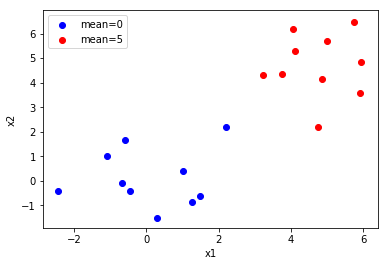

In [50]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.RandomState(123)

d, N, mean = 2, 10, 5
x1 = rng.randn(N,d) + np.array([0,0])
x2 = rng.randn(N,d) + np.array([mean, mean])
x = np.concatenate((x1,x2), axis=0)

plt.scatter(x1[:,0], x1[:,1], c='b', label="mean=0")
plt.scatter(x2[:,0], x2[:,1], c='r', label="mean=5")
plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

W = [ 2.14037745  1.2763927 ], b = -9


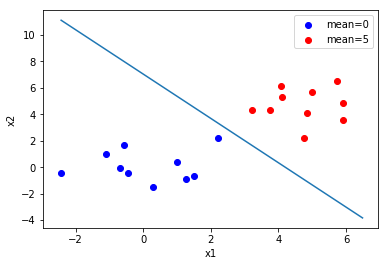

In [51]:
w = np.zeros(d)
b = 0

def y(x):
    return step(np.dot(w,x)+b)

def step(x):
    return 1*(x>0)

def t(i):
    return 0 if i<N else 1
    
while True:
    classified = True
    for i in range(N*2):
        delta_w = (t(i) - y(x[i])) * x[i]
        delta_b = (t(i) - y(x[i]))
        w += delta_w
        b += delta_b
        classified *= all(delta_w==0)*(delta_b==0)
    if classified:
        break
        
print("W = {}, b = {}".format(w, b))
line_x = np.linspace(np.min(x), np.max(x), 100)
plt.plot(line_x, (w[0]*line_x+b) * (-1/w[1]))
plt.scatter(x1[:,0], x1[:,1], c='b', label="mean=0")
plt.scatter(x2[:,0], x2[:,1], c='r', label="mean=5")
plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

---
### ロジスティック回帰

単純パーセプトロンに確率的な出力を導入し、出力が行われることを「発火」と表現する  
　（注：表記は文献に従っている。生物のニューロンの発火とは無関係である）  
  
ある入力 $X$ に対して発火するとき１を、しないとき０をとる確率変数 $C$ を考える。  
このとき  
  
\begin{align*}
p(C=1|X) & = \sigma (W^{\mathrm{T}}X + b) \\
p(C=0|X) & = 1 - p(C=1|X)
\end{align*}
  
となるので、 $y := \sigma (W^{\mathrm{T}}X + b)$ とすると、上の２式は  
  
\begin{align*}
p(C=t|X) &= y^{t}(1-y)^{1-t} \\ 
&\text{where} \, t \in \{0,1\}
\end{align*}
  
と表すことができる。  

さて、N個の入力データ $X_{n} \, (n=1,2,\dots,N)$ とそれぞれ対応する正解出力 $t_{n}$ が与えられたとき、  
重み $W$ およびバイアス $b$ を最尤推定するための尤度関数は次のように表すことができる。  

\begin{align*}
L(W,b) &= \prod^{N}_{n=1}p(C=t_{n}|X_{n}) \\
&= \prod^{N}_{n=1}y^{t_{n}}_{n}(1-y_{n})^{1-t_{n}}
\end{align*}

学習を最適化問題として捉え、最尤推定（ $L(W,b)$ の最大化）によってパラメータ $W,b$ を調整することを考える。

上の式の対数をとり、一般的な表記に合わせるため符号を入れ替えて、
交差エントロピー誤差関数
 
 \begin{align*}
 E(W,b) :=& -\log L(W,b) \\
 =& -\sum^{N}_{n=1} \{ t_{n}\log y_{n} + (1-t_{n}) \log (1-y_{n}) \}
 \end{align*}
 
を与える。

---
#### 勾配降下法 (gradient descent)

\begin{align*}
W^{(k+1)} &= W^{(k)} - \eta \frac{\partial E(W,b)}{\partial W} \\
b^{(k+1)} &= b^{(k)} - \eta \frac{\partial E(W,b)}{\partial b}
\end{align*}
ここで $\eta$ は学習率である。

交差エントロピー誤差関数を  
  
\begin{align*} E(W,b) := -\sum^{N}_{n=1}E_{n} \end{align*}  
すなわち  
\begin{align*} E_{n} := -\{ t_{n}\log y_{n} + (1-t_{n} \log (1-y_{n}) \} \end{align*}  
と表すと、重み $W$ の勾配は

\begin{align*}
\frac{\partial E(W,b)}{\partial W} &= \sum^{N}_{n=1} \frac{\partial E_{n}}{\partial y_{n}} \frac{\partial y_{n}}{\partial W} \\
&= -\sum^{N}_{n=1} \left( \frac{t_{n}}{y_{n}} - \frac{1-t_{n}}{1-y_{n}} \right) \frac{\partial y_{n}}{\partial W} \\
&= -\sum^{N}_{n=1} \left( \frac{t_{n}}{y_{n}} - \frac{1-t_{n}}{1-y_{n}} \right) y_{n}(1-y_{n})X_{n} \\
&= -\sum^{N}_{n=1} \left( t_{n}(1-y_{n}) - y_{n}(1-t_{n}) \right) X_{n} \\
&= -\sum^{N}_{n=1} \left( t_{n} - y_{n} \right) X_{n}
\end{align*}

となる。バイアス $b$ についても同様に計算して

\begin{align*}
\frac{\partial E(W,b)}{\partial b} =　-\sum^{N}_{n=1} \left( t_{n} - y_{n} \right)
\end{align*}

となるから、パラメータの更新式は

\begin{align*}
W^{(k+1)} &= W^{(k)} - \eta \sum^{N}_{n=1} \left( t_{n} - y_{n} \right) X_{n} \\
b^{(k+1)} &= b^{(k)} - \eta \sum^{N}_{n=1} \left( t_{n} - y_{n} \right)
\end{align*}

と書くことができる。

上記の更新式はN個のデータについて総和をとる必要があり、巨大なデータセットに対しては現実的でない。  
そこで勾配降下法のオンライン版である確率的勾配降下法 (Stochastic gradient descent) を用いる。  
これはパラメータの更新に際しランダムにデータを選択して更新式を適用するもので、  

\begin{align*}
W^{(k+1)} &= W^{(k)} - \eta \left( t_{n} - y_{n} \right) X_{n} \\
b^{(k+1)} &= b^{(k)} - \eta \left( t_{n} - y_{n} \right)
\end{align*}

と表される。

データ全体を用いるバッチ学習とランダムに１つを選んでの更新を繰り返すオンライン学習との中間として  
ミニバッチ学習があり、よく用いられる。  

----
#### TensorFlowによる実装
（tensorflowのバージョンアップに伴い、githubに掲載されているコードを参照した。  
　参照：[deeplearning-tensorflow-keras/3/tensorflow/01_logistic_regression_or_tensorflow.py](https://github.com/yusugomori/deeplearning-tensorflow-keras/blob/master/3/tensorflow/01_logistic_regression_or_tensorflow.py)）

memo:  
　TensorFlowをpip installするとpython3.5用のものが入るので、エラーが生じる場合は  
　[公式の手順](https://www.tensorflow.org/install/install_linux#InstallingNativePip)から[バイナリのURL](https://www.tensorflow.org/install/install_linux#the_url_of_the_tensorflow_python_package)を指定して導入またはUpgradeしておく
  
参考：  
　[TensorFlow 1.4 (gpu Linux) Py36 not built with Py36 #14218](https://github.com/tensorflow/tensorflow/issues/14218)  
　[Creating a specific 3.6 binary for Linux #14182](https://github.com/tensorflow/tensorflow/issues/14182)  

In [2]:
import numpy as np
import tensorflow as tf

# 変数、パラメータ、誤差関数の定義
w = tf.Variable(tf.zeros([2,1]))
b = tf.Variable(tf.zeros([1]))

x = tf.placeholder(tf.float32, shape=[None, 2])
t = tf.placeholder(tf.float32, shape=[None, 1])
y = tf.nn.sigmoid(tf.matmul(x,w)+b)

cross_entropy = -tf.reduce_sum(t * tf.log(y) + (1-t) * tf.log(1-y))

# 学習と結果確認方法の定義
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)
correct_prediction = tf.equal(tf.to_float(tf.greater(y, 0.5)), t)

# データの準備
X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([[0], [1], [1], [1]])

# セッションの作成と初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 学習の実行
for epoch in range(200):
    sess.run(train_step, feed_dict = {
        x: X,
        t: Y
    })

In [3]:
# 学習結果の確認
classified = correct_prediction.eval(session=sess, feed_dict={
    x: X,
    t: Y
})
print("classified:\n", classified)

prob = y.eval(session=sess, feed_dict={
    x: X,
    t: Y
})
print("output probability:\n", prob)

print("parameter:\n W={}, \n b={}".format(sess.run(w), sess.run(b)))

classified:
 [[ True]
 [ True]
 [ True]
 [ True]]
output probability:
 [[ 0.22355038]
 [ 0.91425949]
 [ 0.91425949]
 [ 0.99747425]]
parameter:
 W=[[ 3.61188436]
 [ 3.61188436]], 
 b=[-1.24509501]


#### Kerasによる実装

In [4]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential([
    Dense(input_dim=2, units=1),
    Activation('sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))

X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([[0], [1], [1], [1]])

model.fit(X, Y, epochs=200, batch_size=1)

classes = model.predict_classes(X, batch_size=1)
prob = model.predict_proba(X, batch_size=1)

print("\n\nclassified:\n", Y==classes)
print("\noutput probability:\n", prob)

Using TensorFlow backend.


Epoch 1/200
4/4 [==============================] - 0s - loss: 1.1153     
Epoch 2/200
4/4 [==============================] - 0s - loss: 0.9699     
Epoch 3/200
4/4 [==============================] - 0s - loss: 0.8575     
Epoch 4/200
4/4 [==============================] - 0s - loss: 0.7739     
Epoch 5/200
4/4 [==============================] - 0s - loss: 0.7087     
Epoch 6/200
4/4 [==============================] - 0s - loss: 0.6595     
Epoch 7/200
4/4 [==============================] - 0s - loss: 0.6215     
Epoch 8/200
4/4 [==============================] - 0s - loss: 0.5914     
Epoch 9/200
4/4 [==============================] - 0s - loss: 0.5676     
Epoch 10/200
4/4 [==============================] - 0s - loss: 0.5477     
Epoch 11/200
4/4 [==============================] - 0s - loss: 0.5312     
Epoch 12/200
4/4 [==============================] - 0s - loss: 0.5172     
Epoch 13/200
4/4 [==============================] - 0s - loss: 0.5045     
Epoch 14/200
4/4 [================

#### PyTorchによる実装

参考：  
[PyTorch Tutorials](http://pytorch.org/tutorials/)  
[epochventures/PyTorch/XOR.py](https://github.com/epochventures/PyTorch/blob/master/XOR.py)   

In [23]:
import numpy as np
import torch
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F
from torch import optim
import torch.utils.data

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2,1)
        
    def forward(self, x):
        x = F.sigmoid(self.fc1(x))
        return x

X = [[0,0], [0,1], [1,0], [1,1]]
Y = [[0], [1], [1], [1]]

net = Net()
criterion = nn.BCELoss() # binary_crossentropy
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

for epoch in range(200):

    running_loss = 0.0 

    for i, data in enumerate(zip(X,Y)):
        inputs, labels = data
        inputs, labels = Variable(torch.FloatTensor(inputs)), Variable(torch.FloatTensor(labels))
        
        # GPUを使用する場合の例
        # net.cuda()
        # inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
        
        optimizer.zero_grad()
        outputs = net(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.data[0]

    print('epoch:{}/200, loss:{}'.format(epoch + 1, running_loss))

print('Finished Training')
print(net(Variable(torch.FloatTensor(X))))

epoch:1/200, loss:3.833631217479706
epoch:2/200, loss:3.621105968952179
epoch:3/200, loss:3.2993175387382507
epoch:4/200, loss:2.950357973575592
epoch:5/200, loss:2.6273014545440674
epoch:6/200, loss:2.356114536523819
epoch:7/200, loss:2.1426139771938324
epoch:8/200, loss:1.9810305833816528
epoch:9/200, loss:1.8610761761665344
epoch:10/200, loss:1.7722336947917938
epoch:11/200, loss:1.7056519836187363
epoch:12/200, loss:1.6545888632535934
epoch:13/200, loss:1.6141964197158813
epoch:14/200, loss:1.5811055600643158
epoch:15/200, loss:1.5530239269137383
epoch:16/200, loss:1.528408795595169
epoch:17/200, loss:1.5062270611524582
epoch:18/200, loss:1.4857889786362648
epoch:19/200, loss:1.4666314348578453
epoch:20/200, loss:1.4484435766935349
epoch:21/200, loss:1.4310133755207062
epoch:22/200, loss:1.4141965880990028
epoch:23/200, loss:1.3978931531310081
epoch:24/200, loss:1.382032498717308
epoch:25/200, loss:1.3665642514824867
epoch:26/200, loss:1.3514516726136208
epoch:27/200, loss:1.336667

---
### 多クラスロジスティック回帰

#### ソフトマックス関数
多クラス分類については、シグモイド関数の代わりにソフトマックス関数

\begin{align*}
\text{softmax}(x)_{i} &= \frac{\mathrm{e}^{x_{i}}}{\sum^{n}_{j=1}\mathrm{e}^{x_{i}}} & (i = 1, 2, \dots, n)
\end{align*}

が用いられる。  
ソフトマックス関数は、$n=2$ のとき

\begin{align*}
\text{softmax}(x)_{1} = \frac{\mathrm{e}^{x_{1}}}{\mathrm{e}^{x_{1}} + \mathrm{e}^{x_{2}}} = \frac{1}{1 + \mathrm{e}^{x_{2}-x_{1}}}
\end{align*}

と変形できる。  
  
また、$y_{i} = \text{softmax}(x)_{i}$ とおくとき、  

\begin{align*}
0 < y_{i} < 1 \\
\sum_{i=1}^{n}y_{i} = 1
\end{align*}

が成り立つ。

さて、

\begin{align*}
Z := \sum_{j=1}^{n}\mathrm{e}^{x_{i}}
\end{align*}

とおくとき、ソフトマックス関数の微分は

\begin{align*}
\text{when} \, &(i=j) & \frac{\partial y_{i}}{\partial x_{i}} &= \frac{\mathrm{e}^{x_{i}}Z - \mathrm{e}^{x_{i}}\mathrm{e}^{x_{i}}}{Z^{2}} = y_{i}(1-y_{i}) \\
&(i \neq j) & \frac{\partial y_{i}}{\partial x_{i}} &= \frac{- \mathrm{e}^{x_{i}}\mathrm{e}^{x_{j}}}{Z^{2}} = - y_{i}y_{j}
\end{align*}

となるので、これをまとめて

\begin{align*}
\frac{\partial y_{i}}{\partial x_{i}} =\begin{cases}
y_{i}(1-y_{i}) & (i=j) \\
- y_{i}y_{j} & (i \neq j)
\end{cases}\end{align*}

と表すことができる。

---
#### 多クラス分類のモデル化

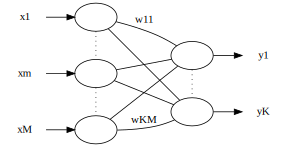

In [74]:
from graphviz import Digraph

dot = Digraph()
dot.graph_attr['rankdir']='LR'
dot.graph_attr['size']="4,4"

with dot.subgraph(name='b_0_0') as c00:
    c00.node('x1', 'x1', shape='plaintext')
    c00.node('l11', '')
    c00.edge('x1', 'l11')
    c00.attr(label='abcde')
with dot.subgraph(name='b_0_1') as c01:
    c01.node('xm', 'xm', shape='plaintext')
    c01.node('l1m', '')
    c01.edge('xm', 'l1m')
with dot.subgraph(name='b_0_2') as c02:
    c02.node('xM', 'xM', shape='plaintext')
    c02.node('l1M', '')
    c02.edge('xM', 'l1M')
with dot.subgraph(name='b_1_0') as c10:
    c10.node('l21', '')
    c10.node('y1', 'y1', shape='plaintext')
    c10.edge('l21', 'y1')
with dot.subgraph(name='b_1_0') as c11:
    c11.node('l2K', '')
    c11.node('yK', 'yK', shape='plaintext')
    c11.edge('l2K', 'yK')
    
dot.edge('l11', 'l21', arrowhead='none', label='w11')
dot.edge('l1m', 'l21', arrowhead='none')
dot.edge('l1M', 'l21', arrowhead='none')
dot.edge('l11', 'l2K', arrowhead='none')
dot.edge('l1m', 'l2K', arrowhead='none')
dot.edge('l1M', 'l2K', arrowhead='none', label='wKM')
    
dot.edge('l11', 'l1m', style='dotted', arrowhead='none')
dot.edge('l1m', 'l1M', style='dotted', arrowhead='none')
dot.edge('l21', 'l2K', style='dotted', arrowhead='none')
dot.body.append('{rank=min; x1; xm; xM;}')
dot.body.append('{rank=same; l11; l1m; l1M;}')
dot.body.append('{rank=same; l21; l2K;}')
dot.body.append('{rank=max; y1; yK;}')
    
dot

多クラス分類のため、上図のように入出力を拡張した１層パーセプトロンを考える。  
入力がM次元ベクトル $X=(x_{1}, x_{2}, \dots, x_{M})^{\mathrm{T}}$ 、出力がK次元ベクトル $Y=(y_{1}, y_{2}, \dots, y_{K})^{\mathrm{T}}$ であるとき、  
あるノードkからのニューロンの出力 $y_{k}$ は

\begin{align*}
y_{k} &= f(W_{k,1}x_{1} + W_{k,2}x_{2} + \dots + W_{k,M}x_{M} + b_{k}) \\
&= f(W^{T}_{k}X + b_{k})
\end{align*}

となる。すると、

\begin{align*}
W &= (W_{1} + W_{2} + \dots + W_{k} + \dots + W_{K})^{\mathrm{T}} \\
& \\
&=\left(
    \begin{array}{ccccc}
      w_{11} & \dots & w_{1n} & \dots & w_{1M} \\
      \vdots & & \vdots & & \vdots \\
      w_{k1} & \dots & w_{kn} & \dots & w_{kM} \\
      \vdots & & \vdots & & \vdots \\
      w_{K1} & \dots & w_{Kn} & \dots & w_{KM} \\
    \end{array}
  \right) \\
& \\
b &= \left( \begin{array}{ccc} b_{1} \\ \vdots \\ b_{k} \\ \vdots \\ b_{K} \end{array} \right)
\end{align*}

に対して、モデルの出力全体は

\begin{align*}
Y = f(WX + b)
\end{align*}

と表せる。  
ここで、 $W$ を重み行列、 $b$ をバイアスベクトルと呼ぶ。  
  
活性化関数 $f$ をソフトマックス関数とすることで多クラス分類課題に使えるようになるため、  
このモデルを多クラスロジスティック回帰という。  

いま、入力 $X$ に対して、分類されるいずれかのクラス値を取る確率変数を $C$ とする。  
クラス数がKであるとき、$C$ は1からKまでのいずれかの値を取る。  
  
あるニューロンの出力 $y_{k}$ は、クラスkに $X$ が分類される確率に他ならないので、

\begin{align*}
p(C = k|X) = y_{k} &= \frac{\exp(W^{\mathrm{T}}_{k}X + b_{k})}{\sum^{K}_{j=1} \exp (W^{\mathrm{T}}_{j}X + b_{j})}
\end{align*}

となる。

次に、尤度関数について考える。  
N個の入力データ $Xn \, (n=1,2,\dots,N) $ と、それに対応する正解データ $t_{n}$ があるとする。  
$X_{n}$ がクラス $k$ に属するとき、 $t_{n}$ の $j$ 番目の成分 $t_{nk}$ は、  

\begin{align*}
t_{nj} = \begin{cases} 1 &(j=k) \\ 0 &(j \neq k) \end{cases}
\end{align*}

となる。（すなわち、 $t_{n}$ はone-hot vectorである）  
このとき、 $y_{n} := \text{softmax}(WX_{n} + b)$ に対して

\begin{align*}
L(W,b) &= \prod_{n=1}^{N} \prod_{k=1}^{K} p(C = k|X_{n})^{t_{nk}} \\
&= \prod_{n=1}^{N} \prod_{k=1}^{K}y^{t_{nk}}_{nk}
\end{align*}

が得られる。  
単純パーセプトロンのときと同様に、対数をとって符号を反転させると、交差エントロピー誤差関数  

\begin{align*}
E(W,b) :=& -\log L(W,b) \\
=& - \sum_{n=1}^{N} \sum_{k=1}^{K} t_{nk} \log y_{nk}
\end{align*}

が求まる。

勾配降下法を適用するため、各パラメータに対する勾配を求める。  
  
< 重み $W$ に対する勾配 > 

\begin{align*}
W = (W_{1} + W_{2} + \dots + W_{k} + \dots + W_{K})^{\mathrm{T}}
\end{align*}

より

\begin{align*}
E := \,& E(W,b) \\
= \,& E(W_{1} + W_{2} + \dots + W_{k} + \dots + W_{K}, b)
\end{align*}

とおく。$I$ をK次単位行列、 $a_{n} := WX_{n} + b$ とすると、

\begin{align*}
\frac{\partial E}{\partial W_{j}} &= -\sum_{n=1}^{N} \sum_{k=1}^{K} \frac{\partial}{\partial y_{nk}}(t_{nk} \log y_{nk}) \frac{\partial y_{nk}}{\partial a_{nj}} \frac{\partial a_{nj}}{\partial W_{j}} \\
&= -\sum_{n=1}^{N} \sum_{k=1}^{K} \frac{t_{nk}}{y_{nk}} \frac{\partial y_{nk}}{\partial a_{nj}} X_{n} \\
&= -\sum_{n=1}^{N} \sum_{k=1}^{K} \frac{t_{nk}}{y_{nk}} y_{nk}(I_{kj} - y_{nk})X_{n} \\
&= -\sum_{n=1}^{N} \left( \sum_{k=1}^{K}t_{nk}I_{kj} - \sum_{k=1}^{K}t_{nk}y_{nj} \right) X_{n} \\
&= -\sum_{n=1}^{N} (t_{nj} - y_{nj})X_{n}
\end{align*}

< バイアス $b$ に対する勾配 >   
同様にして、  

\begin{align*}
\frac{\partial E}{\partial b_{j}} = - \sum_{n=1}^{N}(t_{nk} - y_{nj})
\end{align*}

となる。  

以上をまとめて、

\begin{align*}
\frac{\partial E}{\partial W} &= -\sum_{n=1}^{N} (t_{n} - y_{n})X_{n}^{\mathrm{T}} \\
\frac{\partial E}{\partial b} &= - \sum_{n=1}^{N}(t_{n} - y_{n})
\end{align*}

が求まった。

---
#### TensorFlowによる実装

入力２，出力３の３クラス分類ロジスティック回帰を実装する。  
各クラスのデータは平均 $\mu_{n} \neq 0$ の正規分布に従い、クラスごとのデータ者100とする。  
  
また、ミニバッチSGDによる学習を行う。  

X.shape =  (300, 2)
Y.shape =  (300, 3)


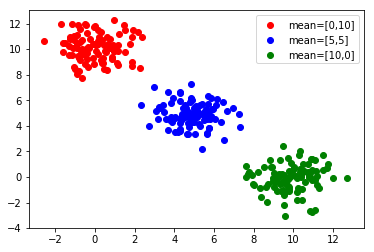

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

M=2 # dimention of input data
K=3 # the number of classes
n=100 # the number of data per each class
N=n*K # total number of data

# sample dataset
np.random.seed(0)
tf.set_random_seed(0)

X1 = np.random.randn(n,M) + np.array([0,10])
X2 = np.random.randn(n,M) + np.array([5,5])
X3 = np.random.randn(n,M) + np.array([10,0])
Y1 = np.array([[1,0,0] for i in range(n)])
Y2 = np.array([[0,1,0] for i in range(n)])
Y3 = np.array([[0,0,1] for i in range(n)])

X = np.concatenate((X1, X2, X3), axis=0)
Y = np.concatenate((Y1, Y2, Y3), axis=0)

print("X.shape = ", X.shape)
print("Y.shape = ", Y.shape)

plt.scatter(X1[:,0], X1[:,1], c='r', label="mean=[0,10]")
plt.scatter(X2[:,0], X2[:,1], c='b', label="mean=[5,5]")
plt.scatter(X3[:,0], X3[:,1], c='g', label="mean=[10,0]")
plt.legend()
plt.show()

In [89]:
from sklearn.utils import shuffle

# model setting
W = tf.Variable(tf.zeros([M,K]))
b = tf.Variable(tf.zeros([K]))

x = tf.placeholder(tf.float32, shape=[None, M])
t = tf.placeholder(tf.float32, shape=[None, K])
y = tf.nn.softmax(tf.matmul(x,W) + b)

cross_entropy = tf.reduce_mean(-tf.reduce_sum(t * tf.log(y), reduction_indices=[1]))

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(t,1))


# learning
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 50
n_batches = N // batch_size

for epoch in range(20):
    X_, Y_ = shuffle(X,Y)
    
    for i in range(n_batches):
        start = i * batch_size
        end = start + batch_size
        
        sess.run(train_step, feed_dict={
            x: X_[start:end],
            t: Y_[start:end]
        })
        
# check result
X_, Y_ = shuffle(X,Y)

classified = correct_prediction.eval(session=sess, feed_dict={
    x: X_[0:10],
    t: Y_[0:10]
})
prob = y.eval(session=sess, feed_dict={
    x: X_[0:10]
})

print('classified:')
print(classified)
print()
print('output probability:')
print(prob)
print()
print("parameter:\n W={}, \n b={}".format(sess.run(W), sess.run(b)))

classified:
[ True  True  True  True  True  True  True  True  True  True]

output probability:
[[  9.87794995e-01   1.22050513e-02   1.88995664e-08]
 [  2.69929412e-09   2.90587149e-03   9.97094154e-01]
 [  1.17402747e-01   8.71111274e-01   1.14860097e-02]
 [  9.81616616e-01   1.83833446e-02   5.69576635e-08]
 [  2.50821046e-07   6.89897016e-02   9.31010008e-01]
 [  9.98301208e-01   1.69882015e-03   8.59508992e-11]
 [  2.37434428e-08   7.24603282e-03   9.92753923e-01]
 [  9.90505278e-01   9.49475449e-03   1.84695264e-08]
 [  2.02121242e-04   8.85585546e-01   1.14212289e-01]
 [  1.95146166e-09   9.97832138e-03   9.90021646e-01]]

parameter:
 W=[[-1.09316552  0.30220953  0.79095626]
 [ 0.79625851  0.2952835  -1.09154177]], 
 b=[-0.06021591  0.10705093 -0.04683502]


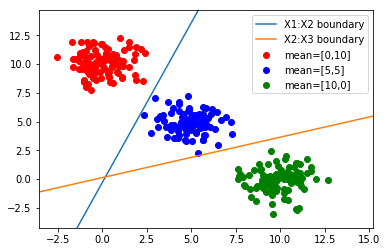

In [105]:
Wv=np.array([[-1.09316552, 0.30220953, 0.79095626], 
             [0.79625851, 0.2952835, -1.09154177]])
bv=np.array([-0.06021591, 0.10705093, -0.04683502])

XL = np.linspace(np.min(X[:,0])*1.4, np.max(X[:,0])*1.4, 1000)
C12 = (1/(Wv[1][1]-Wv[1][0])) * ((Wv[0][0] - Wv[0][1]) * XL + (bv[1] - bv[0]))
C23 = (1/(Wv[1][2]-Wv[1][1])) * ((Wv[0][1] - Wv[0][2]) * XL + (bv[2] - bv[1]))
#C31 = (1/(Wv[1][0]-Wv[1][2])) * ((Wv[0][2] - Wv[0][0]) * XL + (bv[0] - bv[2]))

plt.plot(XL, C12, label="X1:X2 boundary")
plt.plot(XL, C23, label="X2:X3 boundary")
#plt.plot(XL, C31, label="X3:X1 boundary")
plt.scatter(X1[:,0], X1[:,1], c='r', label="mean=[0,10]")
plt.scatter(X2[:,0], X2[:,1], c='b', label="mean=[5,5]")
plt.scatter(X3[:,0], X3[:,1], c='g', label="mean=[10,0]")
plt.xlim(np.min(X[:,0])*1.4, np.max(X[:,0])*1.2)
plt.ylim(np.min(X[:,1])*1.4, np.max(X[:,1])*1.2)
plt.legend()
plt.show()

---
#### kerasによる実装

In [3]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from sklearn.utils import shuffle

model = Sequential()
model.add(Dense(input_dim=M, units=K))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1))

batch_size = 50
model.fit(X, Y, epochs=20, batch_size = batch_size)

X_, Y_ = shuffle(X,Y)
classes = model.predict_classes(X_[0:10], batch_size=batch_size)
prob = model.predict_proba(X_[0:10], batch_size=batch_size)

print('classified:')
print(np.argmax(model.predict(X_[0:10]), axis=1)== classes)
print()
print('output probability:')
print(prob)

Epoch 1/20
300/300 [==============================] - 0s - loss: 4.4912     
Epoch 2/20
300/300 [==============================] - 0s - loss: 0.3862     
Epoch 3/20
300/300 [==============================] - 0s - loss: 0.2098     
Epoch 4/20
300/300 [==============================] - 0s - loss: 0.1491     
Epoch 5/20
300/300 [==============================] - 0s - loss: 0.1159     
Epoch 6/20
300/300 [==============================] - 0s - loss: 0.0965     
Epoch 7/20
300/300 [==============================] - 0s - loss: 0.0838     
Epoch 8/20
300/300 [==============================] - 0s - loss: 0.0750     
Epoch 9/20
300/300 [==============================] - 0s - loss: 0.0674     
Epoch 10/20
300/300 [==============================] - 0s - loss: 0.0613     
Epoch 11/20
300/300 [==============================] - 0s - loss: 0.0566     
Epoch 12/20
300/300 [==============================] - 0s - loss: 0.0527     
Epoch 13/20
300/300 [==============================] - 0s - loss: 0.0491 

In [ ]:
 as np
import torch
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F
from torch import optim
import torch.utils.data

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(M,K)
        
    def forward(self, x):
        x = F.sigmoid(self.fc1(x))
        return x

net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

for epoch in range(20):

    running_loss = 0.0 

    for i, data in enumerate(zip(X,Y)):
        inputs, labels = data
        inputs, labels = Variable(torch.FloatTensor(inputs)), Variable(torch.FloatTensor(labels))
        
        # GPUを使用する場合の例
        # net.cuda()
        # inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
        
        optimizer.zero_grad()
        outputs = net(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.data[0]

    print('epoch:{}/200, loss:{}'.format(epoch + 1, running_loss))

print('Finished Training')
print(net(Variable(torch.FloatTensor(X))))